# **Disney+ Content Analysis**

### **Overview**
In this analysis, I examined the Disney+ dataset, sourced from Kaggle (https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows), to gain insights into the content available on the platform. I explored various aspects such as content types, popular directors, frequent cast members, content additions over time, ratings distribution, and top genres/categories.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
df = pd.read_csv('E:/GitHub/DataSets/Disney/disney_plus_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [96]:
df_copy = df.copy()

### **Content Types**
I started by analyzing the distribution of content types on Disney+. The dataset contains a total of 1,452 entries, with 1,052 movies and 398 TV shows. This indicates that movies make up the majority of the content on the platform.

In [71]:
content_distribution = df_copy['type'].value_counts()

print(content_distribution)

Movie      1052
TV Show     398
Name: type, dtype: int64


### **Popular Directors**
I identified the directors with the most content available on Disney+. The top 10 directors with the highest number of entries are as follows:

* Jack Hannah (17 entries)
* John Lasseter (16 entries)
* Paul Hoen (16 entries)
* Charles Nichols (12 entries)
* Robert Stevenson (12 entries)
* Vincent McEveety (10 entries)
* Bob Peterson (10 entries)
* Wilfred Jackson (9 entries)
* Kenny Ortega (9 entries)
* James Algar (9 entries)

In [72]:
director_count = df_copy.groupby('director').size().sort_values(ascending=False)
top_10_director_count = director_count.head(10)

print(f'10 Most Frequent Directors:\n{top_10_director_count}')

10 Most Frequent Directors:
director
Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Charles Nichols     12
Robert Stevenson    12
Vincent McEveety    10
Bob Peterson        10
Wilfred Jackson      9
Kenny Ortega         9
James Algar          9
dtype: int64


### **Frequent Cast Members**
I also analyzed the most frequently cast actors/actresses in Disney+ content. The top 10 cast members with the highest number of appearances are as follows:

* Jim Cummings (33 appearances)
* Walt Disney (20 appearances)
* Bill Farmer (18 appearances)
* Larry the Cable Guy (17 appearances)
* Tress MacNeille (16 appearances)
* Corey Burton (16 appearances)
* Keith Ferguson (16 appearances)
* Pinto Colvig (15 appearances)
* Bob Peterson (15 appearances)
* Jeff Bennett (15 appearances)

In [73]:
# Split the 'cast' column and create a new DataFrame with individual names
cast_names = df['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

frequent_cast = cast_names.value_counts()
top_10_cast = frequent_cast.head(10)

print(f'10 Most frequent cast members:\n{top_10_cast}')

10 Most frequent cast members:
Jim Cummings            33
Walt Disney             20
Bill Farmer             18
Larry the Cable Guy     17
Tress MacNeille         16
Corey Burton            16
Keith Ferguson          16
Pinto Colvig            15
Bob Peterson            15
Jeff Bennett            15
dtype: int64


### **Content Additions Over Time**
I examined the trend of content additions on Disney+ over time. The number of content additions has generally increased over the years, with a significant spike in the number of additions in recent years.

In [74]:
# Conver 'date_added' to a datetime data type
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'])

content_by_year = df_copy.groupby(df_copy['date_added'].dt.year)['title'].count()

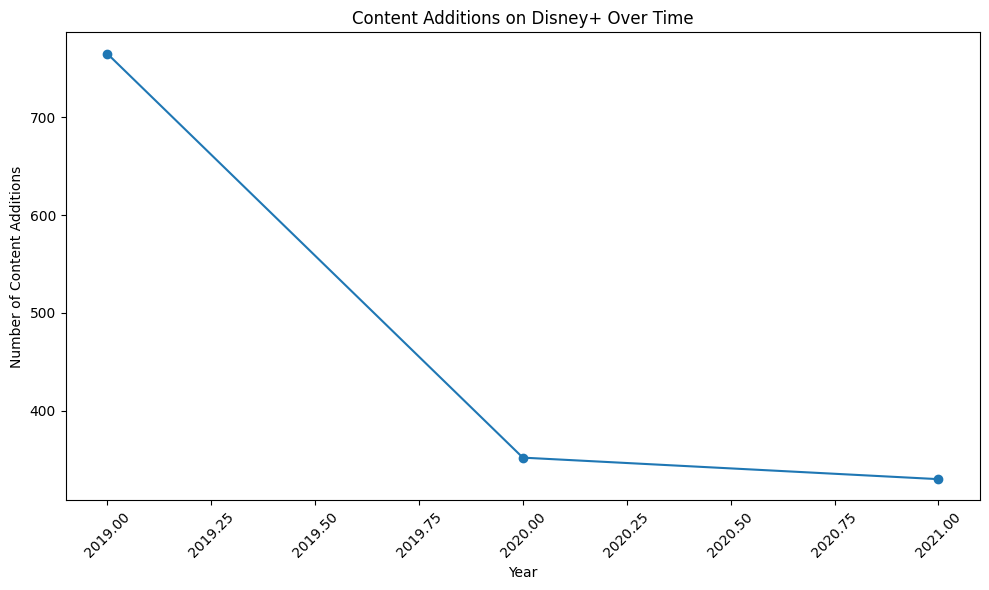

In [75]:
plt.figure(figsize=(10, 6))  # Adjust figure size

plt.plot(content_by_year.index, content_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Content Additions')
plt.title('Content Additions on Disney+ Over Time')

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better legibility

plt.tight_layout()  # Adjust the spacing between the plot elements

plt.show()

### **Ratings Distribution**
I analyzed the distribution of ratings assigned to the content on Disney+. The most common ratings are TV-G, TV-PG, G, and PG, which indicate that the majority of the content is suitable for general audiences and children.

In [76]:
# Unique values of 'rating' column
rating_counts = df_copy['rating'].value_counts()
print(rating_counts)

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64


In [77]:
# Calculate % of distribution of ratings
rating_percentage = rating_counts / len(df_copy) * 100
print(rating_percentage)

TV-G        21.931034
TV-PG       20.758621
G           17.448276
PG          16.275862
TV-Y7        9.034483
TV-14        5.448276
PG-13        4.551724
TV-Y         3.448276
TV-Y7-FV     0.896552
Name: rating, dtype: float64


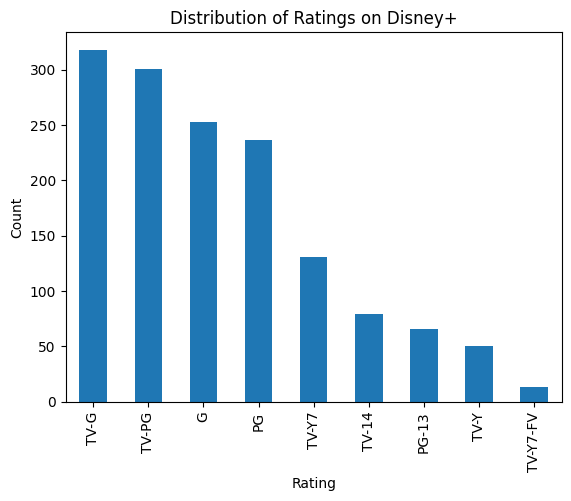

In [78]:
# Visualize the ratings distribution using a bar plot
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings on Disney+')
plt.show()

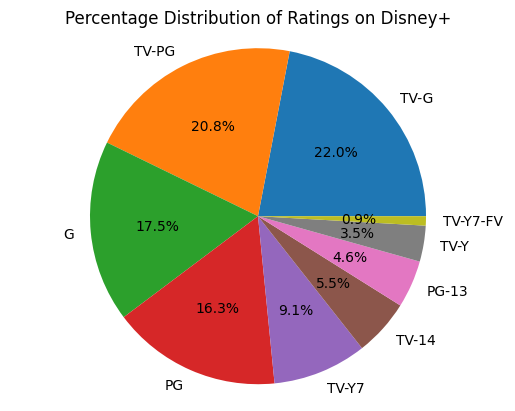

In [79]:
# Visualize % distribution of ratings using a pie chart
rating_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Percentage Distribution of Ratings on Disney+')
plt.axis('equal')
plt.show()

### **Top Genres/Categories**
I explored the most common genres/categories of content on Disney+. The top 10 genres/categories based on the number of entries are as follows:

* Family (632 entries)
* Animation (542 entries)
* Comedy (526 entries)
* Action-Adventure (452 entries)
* Animals & Nature (208 entries)
* Coming of Age (205 entries)
* Fantasy (192 entries)
* Documentary (174 entries)
* Kids (141 entries)
* Drama (134 entries)

In [80]:
genre_counts = df_copy['listed_in'].str.split(', ', expand=True).stack().value_counts()

In [81]:
top_genres = genre_counts.head(10)
print(top_genres)

Family              632
Animation           542
Comedy              526
Action-Adventure    452
Animals & Nature    208
Coming of Age       205
Fantasy             192
Documentary         174
Kids                141
Drama               134
dtype: int64


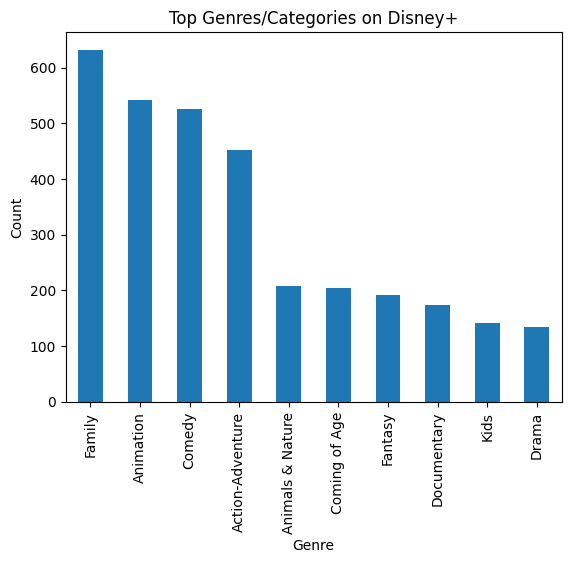

In [82]:
# Visualize the distribution of genres using a bar plot
top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top Genres/Categories on Disney+')

plt.show()

### Conclusion
Based on the analysis, we can observe that Disney+ offers a diverse range of content, including movies and TV shows. The platform includes content from various directors and features popular cast members. Over time, the number of content additions has increased, catering to a wide range of ratings and genres. These insights can be valuable for making informed business decisions regarding content selection and audience targeting.